# **1D Convolutional Neural Network**

**Convolutional neural networks (CNNs) are typically used for image processing, but 1D CNNs are great for pattern detection in time-series data.  The convolutional layers will slide filters over the flux values to detect patterns, such as changes in brightness.**

---


In [5]:
import numpy as np
import tensorflow as tf
import random
import os
import pickle

# Load preprocessed data
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED) # Ensures consistent hashing
os.environ['TF_DETERMINISTIC_OPS'] = '1' # Ensures deterministic TensorFlow operations

In [6]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, GlobalAveragePooling1D, Dense
from tensorflow.keras.initializers import GlorotUniform

# Define the CNN model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.3), # Reduces overfitting

    Conv1D(filters=64, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Fully connected layer for classification
    Dropout(0.3),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
# Convert labels from {1, 2} to {0, 1}
y_train = y_train - 1
y_test = y_test - 1

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30, batch_size=32, verbose=1
)

with open("history_cnn_baseline.pkl", "wb") as f:
    pickle.dump(history.history, f)

model.save("cnn_baseline.keras")

Epoch 1/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 93s 289ms/step - accuracy: 0.5516 - loss: 0.7055 - val_accuracy: 0.9825 - val_loss: 0.2027
Epoch 2/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 140s 443ms/step - accuracy: 0.5874 - loss: 0.6658 - val_accuracy: 0.9807 - val_loss: 0.4463
Epoch 3/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 140s 444ms/step - accuracy: 0.6119 - loss: 0.6426 - val_accuracy: 0.9842 - val_loss: 0.2778
Epoch 4/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 140s 442ms/step - accuracy: 0.6468 - loss: 0.6217 - val_accuracy: 0.1035 - val_loss: 1.2635
Epoch 5/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 138s 438ms/step - accuracy: 0.6659 - loss: 0.5958 - val_accuracy: 0.0649 - val_loss: 2.7709
Epoch 6/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 141s 445ms/step - accuracy: 0.6959 - loss: 0.5686 - val_accuracy: 0.0842 - val_loss: 2.5129
Epoch 7/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 138s 436ms/step - accuracy: 0.7055 - loss: 0.5545 - val_accuracy: 0.1088 - val_loss: 2.0280
Epoch 8/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 139s 438ms/step - accuracy: 0.7171 - 

In [9]:
from sklearn.metrics import classification_report

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1496 - loss: 7.6695
Test Accuracy: 0.1526
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step 
              precision    recall  f1-score   support

           0       0.98      0.15      0.26       565
           1       0.01      0.60      0.01         5

    accuracy                           0.15       570
   macro avg       0.49      0.37      0.14       570
weighted avg       0.97      0.15      0.26       570



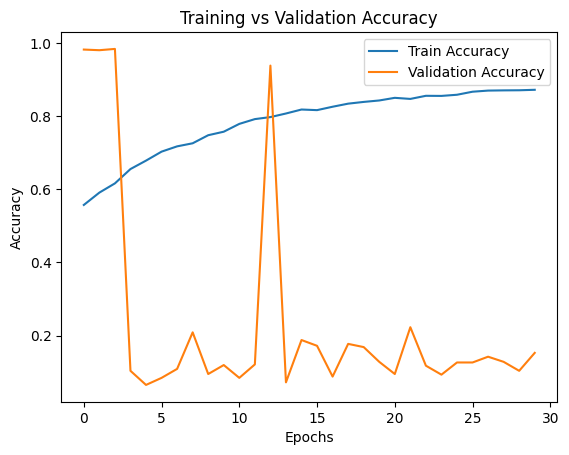

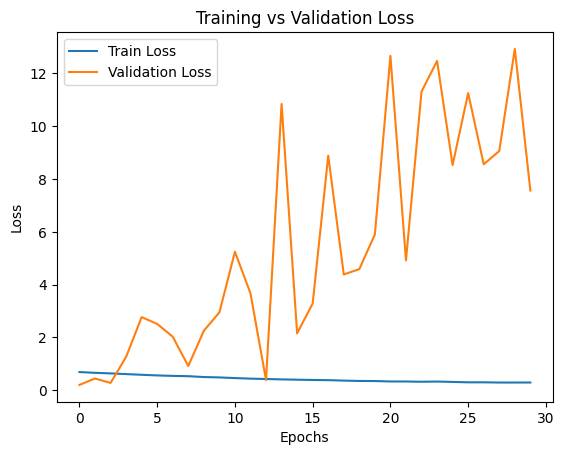

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

## **Model Analysis** 
- **Architecture**: 1D CNN with three convolutional layers followed by a fully connected classification layer.
- **Regularization**: Batch normalization and dropout (`0.3`).
- **Loss Function**: `sparse_categorical_crossentropy` with `softmax` activation.
- **Optimization**: Adam optimizer with default learning rate.
- **Pooling**: Global average pooling applied before the dense layers for dimensionality reduction.

### **Results**
- **Overall Test Accuracy**: `15.26%`
- **Precision for Label 2**: `0.01`
- **Recall for Label 2**: `0.60`
- **F1-Score for Label 2**: `0.01`

### **Observations**
- The recall for Label 2 is 0.6, meaning 60% of actual Label 2 samples were correctly classified. However, the precision and F1-score are low meaning most of the Label 2 predictions are incorrect.

### **Next Steps for Improvement**
1. Introduce Class Weighting (`{0:1, 1:5}`) to encourage the model to pay more attention to Label 2.
2. Lower Learning Rate (`0.0003`) for smoother training and fewer extreme spikes.
3. Implement Early Stopping to monitor validation loss and prevent overfitting.
  

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define class weights
class_weights = {0: 1, 1: 5}  # Encourage the model to focus more on label 2

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop if validation loss doesn’t improve for 5 epochs
    restore_best_weights=True
)

# Redefine model
model_2 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.3), # Reduces overfitting

    Conv1D(filters=64, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Fully connected layer for classification. 
    Dropout(0.3),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.0003), # Moderate reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# Model summary
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
# Train the model
history = model_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply class weighting
    callbacks=[early_stopping],  # Use early stopping
    batch_size=32, verbose=1
)

with open("history_cnn_weighted.pkl", "wb") as f:
    pickle.dump(history.history, f)
    
model_2.save("cnn_weighted.keras")

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 94s 299ms/step - accuracy: 0.4980 - loss: 1.3664 - val_accuracy: 0.0123 - val_loss: 3.1677
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 143s 452ms/step - accuracy: 0.5018 - loss: 1.3302 - val_accuracy: 0.0228 - val_loss: 3.5992
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 148s 470ms/step - accuracy: 0.5105 - loss: 1.2995 - val_accuracy: 0.0211 - val_loss: 5.6892
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 459ms/step - accuracy: 0.5185 - loss: 1.2728 - val_accuracy: 0.0228 - val_loss: 7.0359
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 460ms/step - accuracy: 0.5195 - loss: 1.2594 - val_accuracy: 0.0211 - val_loss: 7.5573
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 145s 458ms/step - accuracy: 0.5261 - loss: 1.2385 - val_accuracy: 0.0175 - val_loss: 8.9343


In [14]:
# Evaluate on test set
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0303 - loss: 3.1121
Test Accuracy: 0.0123
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step 
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.01       570



## Model Analysis 

### **What Changed**
- Added class weights of `{0:1, 1:5}`
- Reduced learning rate of 0.0003 
- Increased possible epochs to 50 and added early stopping with patience of 5.

### **Results**
- **Overall Test Accuracy**: `1.23%`
- **Precision for Label 2**: `0.01`
- **Recall for Label 2**: `1.00`
- **F1-Score for Label 2**: `0.02`

### **Observations**
- The model is overcompensating for the minority class, misclassifying most Label 1s as Label 2.
- This suggests the class weighting is too aggressive.
- Early stopping triggered very early (after 6 epochs), meaning training was cut short.

### **Next Steps for Improvement**
1. Reduce Class Weighting for Label 2. Try `{0:1, 1:3}` instead of `{0:1, 1:5}`.
2. Increase Patience for Early Stopping. Set `patience=10` to allow more training.
3. Keep Learning Rate at `0.0003`, since it at least allowed label 2 to be detected.
   


In [15]:
# Redefine class weights
class_weights = {0: 1, 1: 3}  

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Stop if validation loss doesn’t improve for 10 epochs
    restore_best_weights=True
)

# Redefine model
model_3 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.3), # Reduces overfitting

    Conv1D(filters=64, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.3),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Fully connected layer for classification. 
    Dropout(0.3),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_3.compile(optimizer=Adam(learning_rate=0.0003), # Moderate reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


# Model summary
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
# Train the model
history = model_3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply adjusted class weighting
    callbacks=[early_stopping],  # Use updated early stopping
    batch_size=32, verbose=1
)

with open("history_cnn_weighted_earlystop_patient.pkl", "wb") as f:
    pickle.dump(history.history, f)
    
model_3.save("cnn_weighted_earlystop_patient.keras")

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 90s 279ms/step - accuracy: 0.4952 - loss: 1.1987 - val_accuracy: 0.0088 - val_loss: 2.5564
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 128s 406ms/step - accuracy: 0.4991 - loss: 1.1168 - val_accuracy: 0.0158 - val_loss: 2.4798
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 129s 407ms/step - accuracy: 0.5082 - loss: 1.0919 - val_accuracy: 0.0456 - val_loss: 2.0495
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 133s 420ms/step - accuracy: 0.5198 - loss: 1.0623 - val_accuracy: 0.0281 - val_loss: 4.2767
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 134s 422ms/step - accuracy: 0.5267 - loss: 1.0440 - val_accuracy: 0.0193 - val_loss: 4.5633
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 136s 430ms/step - accuracy: 0.5304 - loss: 1.0272 - val_accuracy: 0.0158 - val_loss: 4.3266
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 138s 438ms/step - accuracy: 0.5350 - loss: 1.0109 - val_accuracy: 0.0175 - val_loss: 3.6993
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 136s 430ms/step - accuracy: 0.5434 - 

In [17]:
# Evaluate on test set
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9687 - loss: 0.1639
Test Accuracy: 0.9877
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



## Model Analysis 

### **What Changed**
- Reduced class weights to `{0:1, 1:3}`
- Reduced learning rate of 0.0003 
- Increased early stopping patience to 10.

### **Results**
- **Overall Test Accuracy**: `98.77%`
- **Precision for Label 2**: `0.00`
- **Recall for Label 2**: `0.00`
- **F1-Score for Label 2**: `0.00`

### **Observations**
- The model failed to identify any Label 2 stars again. The accuracy is misleading because almost all test samples belong to Label 1.
- The model ran for the full 50 epochs without early stopping intervening, meaning it may have overfitted to Label 1 due to too high a patience threshold.

### **Next Steps for Improvement**
1. Reintroduce Class Weighting More Strongly. Try `{0:1, 1:4}` (a middle ground).
2. Reduce Learning Rate Further. Drop to `0.0001` to slow down learning adjustments.
3. Reduce Dropout Slightly. Try `0.2` to keep more information.
   

In [18]:
# Adjust class weights
class_weights = {0: 1, 1: 4}  

# Redefine model
model_4 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.2), # Reduced dropout

    Conv1D(filters=64, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.2),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Fully connected layer for classification. 
    Dropout(0.2),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_4.compile(optimizer=Adam(learning_rate=0.0001), # Further reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


# Model summary
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Train the model
history = model_4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply adjusted class weighting
    callbacks=[early_stopping],  # Use updated early stopping
    batch_size=32, verbose=1
)

with open("history_cnn_reduced_learning_rate.pkl", "wb") as f:
    pickle.dump(history.history, f)
    
model_4.save("cnn_reduced_learning_rate.keras")

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 88s 274ms/step - accuracy: 0.4943 - loss: 1.4888 - val_accuracy: 0.0105 - val_loss: 2.1676
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 120s 379ms/step - accuracy: 0.4979 - loss: 1.2783 - val_accuracy: 0.0140 - val_loss: 2.9800
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 120s 381ms/step - accuracy: 0.4995 - loss: 1.2483 - val_accuracy: 0.0228 - val_loss: 2.9636
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 120s 381ms/step - accuracy: 0.5057 - loss: 1.2226 - val_accuracy: 0.0368 - val_loss: 2.8587
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 127s 403ms/step - accuracy: 0.5089 - loss: 1.2055 - val_accuracy: 0.0333 - val_loss: 3.3130
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 128s 404ms/step - accuracy: 0.5153 - loss: 1.1870 - val_accuracy: 0.0368 - val_loss: 3.6243
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 126s 398ms/step - accuracy: 0.5195 - loss: 1.1772 - val_accuracy: 0.0333 - val_loss: 4.3740
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 128s 406ms/step - accuracy: 0.5213 - 

In [20]:
# Evaluate on test set
test_loss, test_accuracy = model_4.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0298 - loss: 2.1067
Test Accuracy: 0.0105
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.00       570



## Model Analysis 

### **What Changed**
- Increased class weights to `{0:1, 1:4}`
- Reduced learning rate of `0.0001`
- Reduced dropout to `0.2`

### **Results**
- **Overall Test Accuracy**: `1.05%`
- **Precision for Label 2**: `0.01`
- **Recall for Label 2**: `1.00`
- **F1-Score for Label 2**: `0.02`

### **Observations**
- The model detects Label 2 samples, but at the cost of overall accuracy.
- The model overcompensated for Label 2 imbalance due to class weighting.   

### **Next Steps for Improvement**
1. Fine-tune class weights further to `{0:1, 1:3.5}` to find a balance.
2. Try a slightly higher learning rate to `0.0002` to help adjustments.


In [21]:
# Adjust class weights
class_weights = {0: 1, 1: 3.5}  

# Redefine model
model_5 = Sequential([

    Input(shape=(X_train.shape[1], 1)),  # Input Layer
    Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Detects patterns in input data
    BatchNormalization(), # Stabalizes training by normalizing activations
    Dropout(0.2), # Reduced dropout

    Conv1D(filters=64, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=5, activation="relu", kernel_initializer=GlorotUniform(seed=42)),
    BatchNormalization(),
    Dropout(0.2),

    GlobalAveragePooling1D(), # Reduces dimensionality while keeping key info

    Dense(64, activation="relu", kernel_initializer=GlorotUniform(seed=42)), # Fully connected layer for classification. 
    Dropout(0.2),

    Dense(2, activation="softmax") # Outputs two classifications
])

# Compile the model
model_5.compile(optimizer=Adam(learning_rate=0.0002), # Further reduction in learning rate
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


# Model summary
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)                   │ (None, 3193, 32)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 3193, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 3193, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 3189, 64)            │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 3189, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 3189, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 3185, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 3185, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 3185, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,866 (237.76 KB)

 Trainable params: 60,418 (236.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
# Train the model
history = model_5.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # More epochs, but early stopping will prevent overfitting
    class_weight=class_weights,  # Apply adjusted class weighting
    callbacks=[early_stopping],  # Use updated early stopping
    batch_size=32, verbose=1
)

with open("history_cnn_final.pkl", "wb") as f:
    pickle.dump(history.history, f)
    
model_5.save("cnn_final.keras")

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 88s 272ms/step - accuracy: 0.4933 - loss: 1.3164 - val_accuracy: 0.0105 - val_loss: 2.6395
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 115s 363ms/step - accuracy: 0.4973 - loss: 1.1902 - val_accuracy: 0.0175 - val_loss: 3.4435
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 116s 367ms/step - accuracy: 0.5040 - loss: 1.1532 - val_accuracy: 0.0228 - val_loss: 3.6138
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 123s 388ms/step - accuracy: 0.5138 - loss: 1.1255 - val_accuracy: 0.0263 - val_loss: 3.7707
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 121s 384ms/step - accuracy: 0.5220 - loss: 1.1047 - val_accuracy: 0.0228 - val_loss: 3.7594
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 127s 403ms/step - accuracy: 0.5279 - loss: 1.0800 - val_accuracy: 0.0175 - val_loss: 3.4144
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 126s 399ms/step - accuracy: 0.5352 - loss: 1.0591 - val_accuracy: 0.0246 - val_loss: 3.7969
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 127s 402ms/step - accuracy: 0.5404 - 

In [23]:
# Evaluate on test set
test_loss, test_accuracy = model_5.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predicted class labels (chooses the highest probability)
y_pred = model_5.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Selects class with highest probability

# Generate classification report
print(classification_report(y_test, y_pred_classes))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0298 - loss: 2.5858
Test Accuracy: 0.0105
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.00       570



## Final Model Analysis 

### **What Changed**
- Adjusted class weights to `{0:1, 1:3.5}`
- Increased learning rate of `0.0002`

### **Results**
- **Overall Test Accuracy**: `1.05%`
- **Precision for Label 2**: `0.01`
- **Recall for Label 2**: `1.00`
- **F1-Score for Label 2**: `0.02`

### **Observations**
- Overall results for this model are the same as the previous iteration.
- The core challenge remains: The model struggles to balance both classes effectively. 

---

### **Conclusions from This Notebook**
- This CNN architecture is insufficient for effectively distinguishing between exoplanet signals.
- The data itself may require additional feature extraction (such as periodicity analysis) for better classification.
- Further experimentation with model architectures is needed to improve classification balance.

### **Next Steps - Moving to a New Notebook**
In the next phase of this project, I will explore the LSTM architecture, which may be better suited to the sequential nature of the flux data.
